# Рубежный контроль №1
### Студент: Молчанов Алексей
### Группа: ИУ5-24М
### Варинат №11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline

In [2]:
data = pd.read_csv('Train_prepared.csv')

In [3]:
data.shape

(10999, 12)

In [4]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Задание 1 (Задача №11)

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.

In [5]:
def impute_column(column, fill_value_param=None):
    
    temp_data = data[[column]].values
    size = temp_data.shape[0]
    
    imputer = SimpleImputer(strategy="constant", 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    return all_data.reshape((size,))

In [6]:
print(data.isnull().sum())

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance       0
Gender                 187
Discount_offered         0
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64


In [7]:
newGendres = impute_column('Gender', fill_value_param='d')

In [8]:
data["Gender"] = newGendres
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


### Дополнительное задание

Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

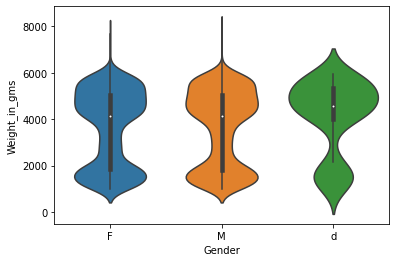

In [9]:
plot = sns.violinplot(x="Gender", y="Weight_in_gms", data=data)

## Задание 2 (Задача №31)

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

In [10]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [12]:
# вставим пропущенные значения по тактике среднего

def impute_nan_columns(num_column):
    temp_data = data[["Sulfate"]].values
    size = temp_data.shape[0]
    imputer = SimpleImputer(strategy="mean")
    all_data = imputer.fit_transform(temp_data)
    return all_data.reshape((size,))
    
data["Sulfate"]=impute_nan_columns("Sulfate")
data["ph"]=impute_nan_columns("ph")
data["Trihalomethanes"]=impute_nan_columns("Trihalomethanes")

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,368.516441,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,368.516441,2.963135,0
1,333.775777,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,333.775777,4.500656,0
2,333.775777,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,333.775777,3.055934,0
3,356.886136,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,356.886136,4.628771,0
4,310.135738,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,310.135738,4.075075,0


In [13]:
X=data.drop(["Potability"], axis=1)
y=data["Potability"]

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(X, y)

In [22]:
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.57142857, 0.54456654, 0.55921856, 0.55799756]),
  'avg_score': 0.5583028083028083,
  'feature_names': ('Hardness',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.54945055, 0.55921856, 0.54578755, 0.53601954]),
  'avg_score': 0.5476190476190476,
  'feature_names': ('Hardness', 'Solids')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.54945055, 0.55677656, 0.57020757, 0.53968254]),
  'avg_score': 0.5540293040293041,
  'feature_names': ('ph', 'Hardness', 'Solids')},
 4: {'feature_idx': (0, 1, 2, 5),
  'cv_scores': array([0.56043956, 0.55311355, 0.56043956, 0.54578755]),
  'avg_score': 0.554945054945055,
  'feature_names': ('ph', 'Hardness', 'Solids', 'Conductivity')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.56043956, 0.55311355, 0.56043956, 0.54578755]),
  'avg_score': 0.554945054945055,
  'feature_names': ('ph',
   'Hardness',
   'Solids',
   'Chloramines',
   'Conductivity')},
 6: {'feature_idx': (0,

In [23]:
sfs1.k_feature_names_

('ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity')

In [24]:
sfs1.k_score_

0.5485347985347986

Из анализа видно, что наибольшая точность модели при 1 признаке. Проведём ещё один прогон для 1 признака.

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=1, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(X, y)

In [29]:
sfs1.k_feature_names_

('Hardness',)

In [30]:
sfs1.k_score_

0.5583028083028083